--- Babylonian Square Root Method ---

--- Problem 1: Basic Example ---
√25 ≈ 5.0000000001
True Value: 5.0
Iterations: [1, 2, 3, 4, 5, 6]
True Error: 5.3722359894e-11

--- Problem 2: Iterations vs Epsilon ---
ε = 1.0e-01, Iterations n = 1
ε = 1.0e-02, Iterations n = 2
ε = 1.0e-03, Iterations n = 3
ε = 1.0e-04, Iterations n = 3
ε = 1.0e-05, Iterations n = 3
ε = 1.0e-06, Iterations n = 4
ε = 1.0e-07, Iterations n = 4
ε = 1.0e-08, Iterations n = 4
ε = 1.0e-09, Iterations n = 4
ε = 1.0e-10, Iterations n = 4
ε = 1.0e-11, Iterations n = 4
ε = 1.0e-12, Iterations n = 5
ε = 1.0e-13, Iterations n = 5
ε = 1.0e-14, Iterations n = 5
ε = 1.0e-15, Iterations n = 5


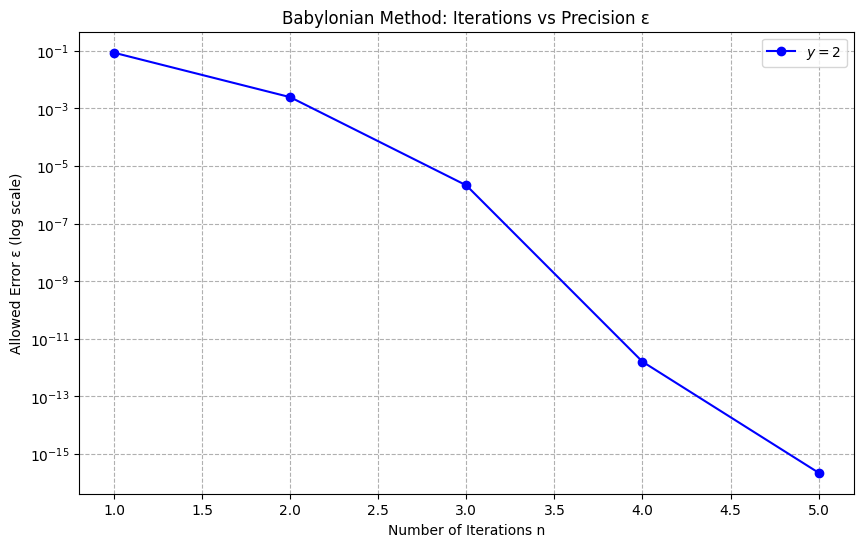

Plot saved as 'problem2_step_vs_epsilon.png'

--- Problem 3: Impact of Initial Guess x0 ---
x0 = 0.1, Iterations n = 8 (ε=1.0e-10)
x0 = 1, Iterations n = 4 (ε=1.0e-10)
x0 = 5, Iterations n = 6 (ε=1.0e-10)
x0 = 10, Iterations n = 7 (ε=1.0e-10)
x0 = 100, Iterations n = 10 (ε=1.0e-10)


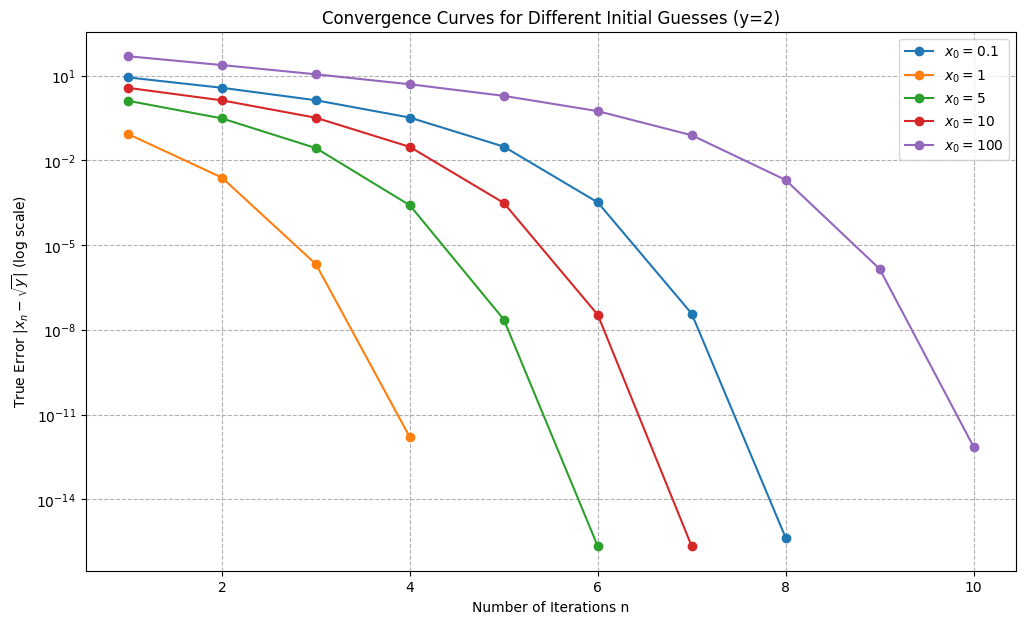

Plot saved as 'problem3_initial_guess_impact.png'

--- Problem 4: Iteration Error vs Iterations ---
Convergence Criterion ε=1.0e-05, Iterations n = 4
Convergence Criterion ε=1.0e-10, Iterations n = 5
Convergence Criterion ε=1.0e-15, Iterations n = 6


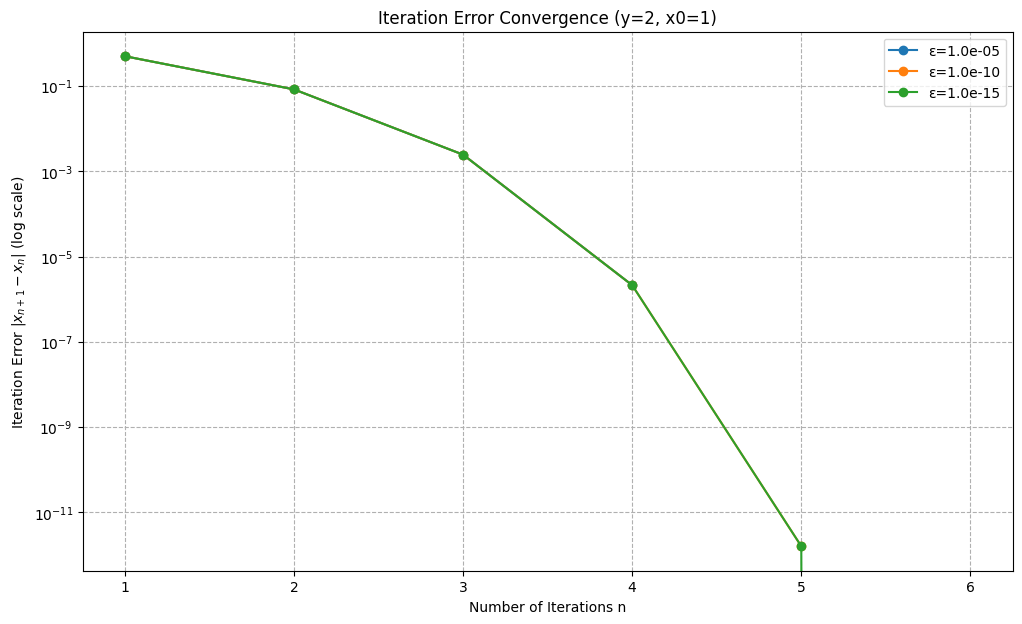

Plot saved as 'problem4_iteration_error.png'


In [1]:
# -*- coding: utf-8 -*-
"""
babylonian_sqrt.py

Implement the Babylonian method (Heron's method) for square root calculation and analyze its convergence.
"""

import math
import matplotlib.pyplot as plt
import numpy as np

# -------------------------- Font configuration (use default English font) --------------------------
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Matplotlib's default font (supports ASCII/math)


# --- Problem 1: Implement the basic Babylonian method ---
def babylonian(y, epsilon, x0=1):
    """
    Calculate the square root of y using the Babylonian method.

    Parameters:
    y (float): Positive number to compute the square root of.
    epsilon (float): Maximum allowed true error (|xn - sqrt(y)| < epsilon to stop).
    x0 (float, optional): Initial guess. Defaults to 1.

    Returns:
    tuple: (Approximated root, Number of iterations, True error)
           Returns (None, None, None) if y is negative.
    """
    if not isinstance(y, (int, float)) or not isinstance(epsilon, (int, float)) or not isinstance(x0, (int, float)):
        raise TypeError("y, epsilon, x0 must be numeric.")

    if y < 0:
        print("Error: Cannot compute square root of negative number.")
        return (None, None, None)
    if y == 0:
        return (0.0, 0, 0.0)

    max_iterations = 1000
    x_n = x0
    n = 0
    n_his=[]
    error_his=[]

    while n < max_iterations:
        x_n1 = 0.5 * (x_n + y / x_n)
        n += 1

        true_sqrt = math.sqrt(y)
        epsilon_n = abs(x_n1 - true_sqrt)
        error_his.append(epsilon_n)
        n_his.append(n)

        if epsilon_n < epsilon:
            return (x_n1, n_his, error_his)

        x_n = x_n1

    print(f"Warning: Did not reach precision {epsilon} after {max_iterations} iterations.")
    final_error = abs(x_n - math.sqrt(y))
    return (x_n, max_iterations, final_error)


# --- Problem 2: Analyze iterations vs epsilon ---
def analyze_step_vs_epsilon(y=2, x0=1):
    """
    Plot the number of iterations required for different epsilon (precision) values.
    """
    print("\n--- Problem 2: Iterations vs Epsilon ---")

    epsilon_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]

    for eps in epsilon_values:
        approx_sqrt, steps, errors = babylonian(y, eps, x0)
        if approx_sqrt is not None:
            print(f"ε = {eps:.1e}, Iterations n = {steps[-1]}")

    plt.figure(figsize=(10, 6))
    plt.plot(steps,errors ,'o-', color='b', label=f'$y = {y}$')
    plt.yscale('log')
    plt.xlabel('Number of Iterations n')
    plt.ylabel('Allowed Error ε (log scale)')
    plt.title('Babylonian Method: Iterations vs Precision ε')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.savefig('problem2_step_vs_epsilon.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Plot saved as 'problem2_step_vs_epsilon.png'")


# --- Problem 3: Analyze impact of initial guess x0 ---
def _babylonian_with_history(y, epsilon, x0=1):
    """
    Helper function: Return iteration history (values and errors).
    """
    if y < 0: return ([], [])
    if y == 0: return ([0.0], [0.0])

    x_history = [x0]
    error_history = []
    max_iterations = 1000
    x_n = x0
    n = 0
    true_sqrt = math.sqrt(y)

    while n < max_iterations:
        x_n1 = 0.5 * (x_n + y / x_n)
        n += 1

        epsilon_n = abs(x_n1 - true_sqrt)
        x_history.append(x_n1)
        error_history.append(epsilon_n)

        if epsilon_n < epsilon:
            break

        x_n = x_n1

    return (x_history, error_history)


def analyze_initial_guess(y=2, epsilon=1e-10):
    """
    Plot convergence curves for different initial guesses x0.
    """
    print("\n--- Problem 3: Impact of Initial Guess x0 ---")

    initial_guesses = [0.1, 1, 5, 10, 100]
    plt.figure(figsize=(12, 7))

    for x0 in initial_guesses:
        x_history, error_history = _babylonian_with_history(y, epsilon, x0)
        if not error_history:
            continue

        steps = len(error_history)
        print(f"x0 = {x0}, Iterations n = {steps} (ε={epsilon:.1e})")
        plt.plot(range(1, steps + 1), error_history, 'o-', label=f'$x_0 = {x0}$')

    plt.yscale('log')
    plt.xlabel('Number of Iterations n')
    plt.ylabel(r'True Error $|x_n - \sqrt{y}|$ (log scale)')
    plt.title(f'Convergence Curves for Different Initial Guesses (y={y})')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.savefig('problem3_initial_guess_impact.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Plot saved as 'problem3_initial_guess_impact.png'")


# --- Problem 4: Implement iteration-based convergence ---
def babylonian2(y, epsilon=1e-10, x0=1):
    """
    Babylonian method with convergence based on |xn+1 - xn| < epsilon.

    Returns:
    tuple: (List of iterations [x0, x1, ...], List of errors [|x1-x0|, ...])
    """
    if y < 0:
        print("Error: Cannot compute square root of negative number.")
        return ([], [])
    if y == 0:
        return ([0.0], [0.0])

    xn_history = [x0]
    epsilon_history = []
    max_iterations = 1000
    x_n = x0

    for _ in range(max_iterations):
        x_n1 = 0.5 * (x_n + y / x_n)
        iter_error = abs(x_n1 - x_n)

        xn_history.append(x_n1)
        epsilon_history.append(iter_error)

        if iter_error < epsilon:
            break

        x_n = x_n1
    else:
        print(f"Warning: Did not converge after {max_iterations} iterations (ε={epsilon}).")

    return (xn_history, epsilon_history)


def analyze_iteration_error(y=2, x0=1):
    """
    Plot iteration error (|xn+1 - xn|) vs number of iterations.
    """
    print("\n--- Problem 4: Iteration Error vs Iterations ---")

    epsilon_conv_criteria = [1e-5, 1e-10, 1e-15]
    plt.figure(figsize=(12, 7))

    for eps in epsilon_conv_criteria:
        x_history, error_history = babylonian2(y, eps, x0)
        if not error_history:
            continue

        steps = len(error_history)
        print(f"Convergence Criterion ε={eps:.1e}, Iterations n = {steps}")
        plt.plot(range(1, steps + 1), error_history, 'o-', label=f'ε={eps:.1e}')

    plt.yscale('log')
    plt.xlabel('Number of Iterations n')
    plt.ylabel(r'Iteration Error $|x_{n+1} - x_n|$ (log scale)')
    plt.title(f'Iteration Error Convergence (y={y}, x0={x0})')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.savefig('problem4_iteration_error.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Plot saved as 'problem4_iteration_error.png'")


# --- Main function ---
if __name__ == '__main__':
    print("--- Babylonian Square Root Method ---")

    # Example for Problem 1
    print("\n--- Problem 1: Basic Example ---")
    y_val = 25
    eps_val = 1e-6
    approx, steps, errors = babylonian(y_val, eps_val)
    if approx is not None:
        print(f"√{y_val} ≈ {approx:.10f}")
        print(f"True Value: {math.sqrt(y_val)}")
        print(f"Iterations: {steps}")
        print(f"True Error: {errors[-1]:.10e}")

    # Run analyses
    analyze_step_vs_epsilon(y=2, x0=1)
    analyze_initial_guess(y=2, epsilon=1e-10)
    analyze_iteration_error(y=2, x0=1)

＃代码说明
＃输入：＃y:代求平方根的数#epsilon:精度要求＃x0:初始值
＃输出：＃x0:迭代结果＃x_his:迭代历史#errors:误差＃sept:迭代次数